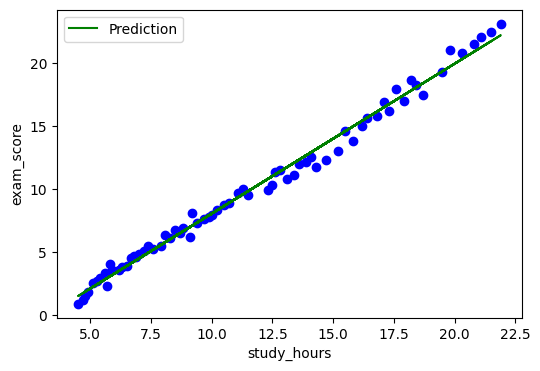

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dữ liệu mẫu ước lượng từ hình ảnh
study_hours = np.array([5.1, 6.3, 7.2, 5.8, 9.1, 4.9, 12.5, 14.3, 8.8, 7.9,
                        10.2, 6.8, 11.5, 15.2, 13.1, 9.7, 5.4, 4.8, 20.3, 18.2,
                        21.5, 19.8, 17.6, 16.4, 5.6, 6.9, 7.4, 8.3, 9.9, 7.6,
                        10.7, 12.8, 11.1, 14.7, 13.4, 8.1, 6.2, 20.8, 21.9, 5.3,
                        17.1, 4.7, 16.8, 6.7, 19.5, 12.3, 15.8, 18.7, 7.0, 8.5,
                        10.0, 5.9, 13.9, 9.2, 11.3, 14.1, 16.2, 17.3, 12.6, 18.4,
                        21.1, 4.5, 5.7, 6.5, 8.7, 10.5, 9.4, 15.5, 13.6, 17.9])

exam_score = np.array([2.5, 3.8, 5.1, 4.0, 6.2, 1.8, 10.3, 11.7, 6.9, 5.5,
                       8.3, 4.7, 9.5, 13.0, 10.8, 7.6, 2.9, 1.5, 20.8, 18.6,
                       22.4, 21.0, 17.9, 15.6, 3.3, 4.6, 5.5, 6.1, 7.8, 5.2,
                       8.9, 11.5, 9.7, 12.3, 11.1, 6.3, 3.6, 21.5, 23.1, 2.7,
                       16.9, 1.2, 15.8, 4.5, 19.3, 9.9, 13.8, 17.4, 4.8, 6.7,
                       7.9, 3.6, 12.1, 8.1, 10.0, 12.5, 15.0, 16.2, 11.3, 18.2,
                       22.0, 0.9, 2.3, 3.9, 6.5, 8.7, 7.3, 14.6, 12.0, 17.0])

# Chuyển dữ liệu về dạng phù hợp cho mô hình
X = study_hours.reshape(-1, 1)
y = exam_score

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị
y_pred = model.predict(X)

# Vẽ biểu đồ
plt.figure(figsize=(6,4))
plt.scatter(study_hours, exam_score, color='blue')  # Vẽ điểm dữ liệu
plt.plot(study_hours, y_pred, color='green', label="Prediction")  # Đường hồi quy
plt.xlabel("study_hours")
plt.ylabel("exam_score")
plt.legend()
plt.show()


 Độ chính xác của mô hình: 0.965034965034965

 Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



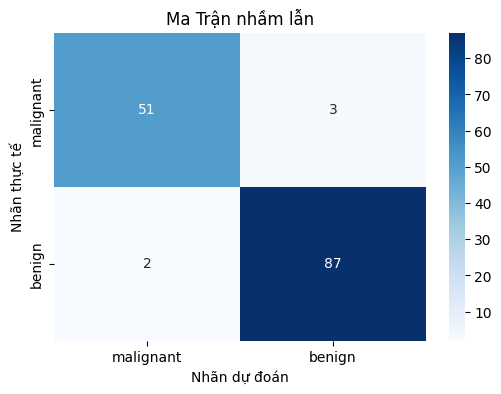

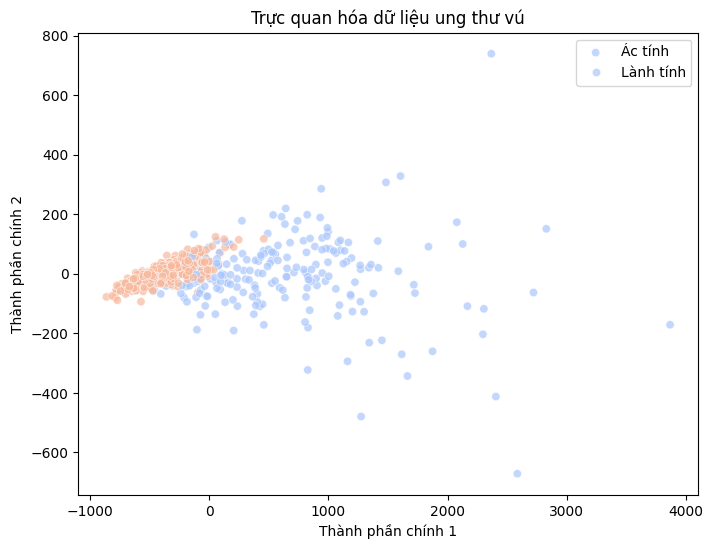

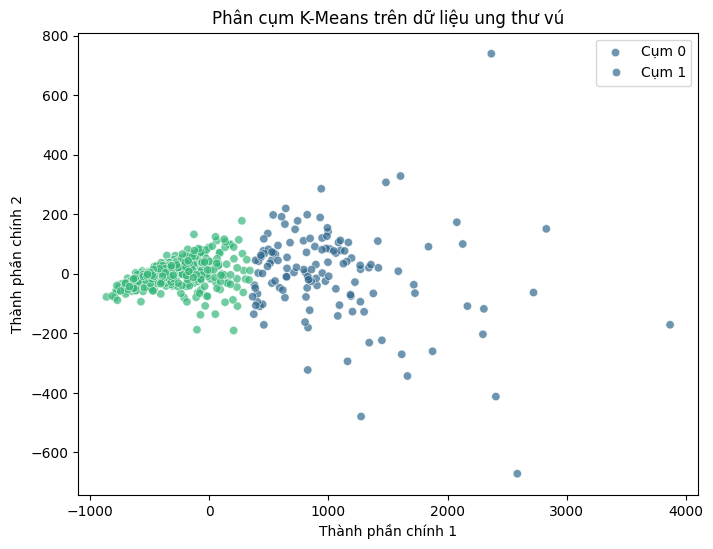

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#load data
data = load_breast_cancer()
X = data.data
y = data.target
# Chia tập dữ liệu thành tập huấn luyện (75%) và tập kiểm tra (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Xây dựng và huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print(" Độ chính xác của mô hình:", accuracy_score(y_test, y_pred))
print("\n Báo cáo phân loại:\n", classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Nhãn dự đoán")
plt.ylabel("Nhãn thực tế")
plt.title("Ma Trận nhầm lẫn")
plt.show()

# Trực quan hóa dữ liệu với PCA (giảm chiều dữ liệu xuống 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm", alpha=0.7)
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.title("Trực quan hóa dữ liệu ung thư vú")
plt.legend(["Ác tính", "Lành tính"])
plt.show()

# Phân cụm K-Means (Clustering)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", alpha=0.7)
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.title("Phân cụm K-Means trên dữ liệu ung thư vú")
plt.legend(["Cụm 0", "Cụm 1"])
plt.show()



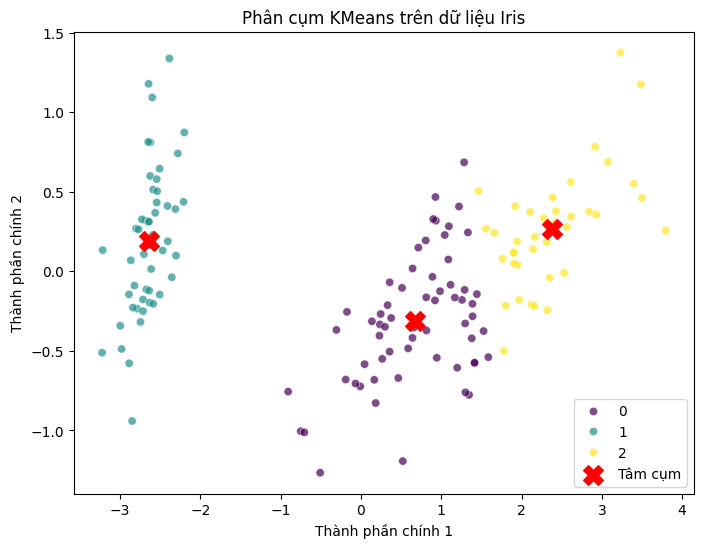

In [ ]:
# Phân cụm
# Import các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Sử dụng dữ liệu Iris để phân cụm
iris = datasets.load_iris()
X = iris.data  # Có 4 đặc trưng
y = iris.target  # Nhãn thực tế để so sánh

# Áp dụng thuật toán KMeans với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
y_Kmeans = kmeans.predict(X)

# Sử dụng PCA để giảm chiều dữ liệu xuống còn 2 chiều
pca = PCA(n_components=2)  # Giảm xuống còn 2 chiều
X_pca = pca.fit_transform(X)

# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(8,6))

# Vẽ scatter plot với kết quả từ KMeans
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_Kmeans, palette="viridis", alpha=0.7)

# Vẽ các tâm cụm
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, color='red', label="Tâm cụm")

# Hiển thị biểu đồ
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")
plt.title("Phân cụm KMeans trên dữ liệu Iris")
plt.legend()
plt.show()


PCA (Principal Component Analysis - Phân tích thành phần chính) là một kỹ thuật giảm chiều dữ liệu. Công dụng chính của PCA bao gồm:

+ Giảm chiều dữ liệu: Giúp giảm số lượng đặc trưng trong tập dữ liệu mà vẫn giữ được phần lớn thông tin.
+ Trực quan hóa dữ liệu: Khi dữ liệu có nhiều chiều (ví dụ: 4, 5, hoặc nhiều hơn), PCA giúp chuyển dữ liệu về 2 hoặc 3 chiều để có thể dễ dàng vẽ biểu đồ.
+ Loại bỏ nhiễu: PCA có thể loại bỏ các đặc trưng ít quan trọng, giúp mô hình phân cụm hoặc phân loại hoạt động hiệu quả hơn.
+ Cải thiện hiệu suất mô hình: Khi dữ liệu có quá nhiều chiều, mô hình máy học có thể bị ảnh hưởng bởi "lời nguyền về chiều". PCA giúp làm giảm số chiều mà vẫn giữ được thông tin quan trọng.
+ Nguồn tham khảo: Scikit-Learn: Principal Component Analysis (PCA)

PCA trong đoạn code này giúp trực quan hóa các cụm dữ liệu trên một biểu đồ 2D, thay vì phải làm việc với dữ liệu 4 chiều ban đầu.
